<a href="https://colab.research.google.com/github/NallelyPintor/Time-Series-ARIMA---SARIMA/blob/main/Time_Series_ARIMA_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline=pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df_airline.tail() #Corroborar que no tengamos ningun NAN

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
#df_airline.dropna(axis=0,inplace=True) #con esto se eliminan las NaN

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month']) #convertimos a fecha

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
df_airline.head() #visualizamos los datos en formato de fecha

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
df_airline.set_index('Month',inplace=True) #el mes lo puedo obtener como mi indice

In [12]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


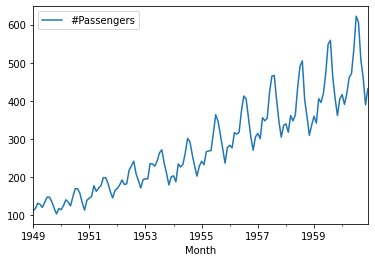

In [13]:
df_airline.plot()

¿Es un dato estacional?

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series) #obtengo 2 valores estadisticas ADF y p-value
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
        # rechazar la hipotesis nula  por lo tanto si son estacionarios
        #fuerte evidencia en contra de la hipótesis nula, rechazar la hipótesis nula. Los datos no tienen raíz unitaria y son estacionarios
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        #no son estacionarios

In [16]:
adf_test(df_airline['#Passengers'])

ADF Statistics: 0.8153688792060472
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


los datos no son estacionarios, vemos el p-value

In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(1)
# diferenciación por un día menos solo se desplaza una posición

In [18]:
df_airline.head()
#el primero es NaN por la resta
#118-112 = 6

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())
#vemos el p-value y podemos decir que no es estacionaria

ADF Statistics: -2.8292668241700056
p- value: 0.054213290283824704
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


hacemos segunda diferenciación

In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna()) #36 : 43
#p-value es 0.00000000....273 por lo que si es mas pequeño que 0.05 entonces si es estacionario 

ADF Statistics: -16.384231542468495
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
##### si se ven datos estacionarios podriamos utilizar esta tecnica
### 12 months... lo haremos 12 meses
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(12) #lo haremos durante todo el año, porque suponemos es estacional
#se dice, la diferencia de 12 pasajeros

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())
# evidencia solida 

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

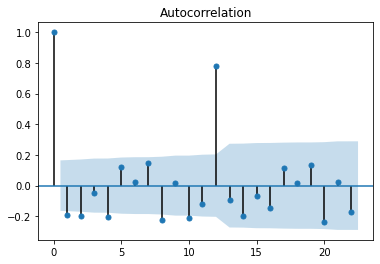

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna()) #correlación automatica

In [26]:
#lineas limite upper bound y lower bound, lo que esta por arriba de esos limites significa que tienen un impacto directo

#la parte azul sombreada aumenta ala derecha y quiere decir que el error tambien aumenta

Del 0 al 13 ( lineas más altas) se puede ver que hay un tipo de estacionalidad , grafico con respecto a las 12 diferencias 

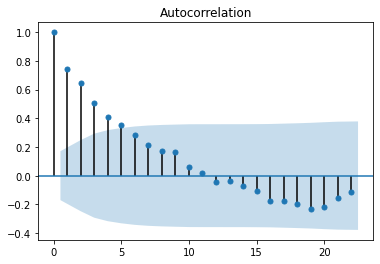

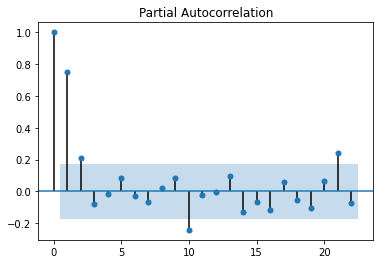

In [27]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna()) #q=5 seleccionamos 5 lineas largas, no contamos el de cero
                                                                    # todos los que estan adentro de la sombra no tienen impacto  48:25
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna()) #linea 28
 ### SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


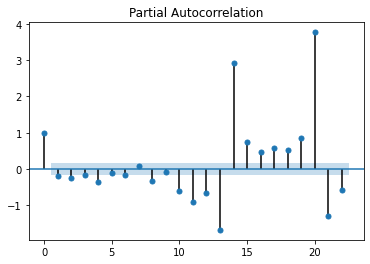

In [28]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())


In [29]:
### split train and test data
df_airline

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [30]:
#Creación del train test
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1) #se crea fecha de finalización
test_dataset_end=datetime(1960,12,1)
#Con la ayuda de PACF OBTENEMOS regresion automatica AR(p)
#Con la ayuda de un ACF estas realizando un promedio movil MA(q)
# y el valor d es la diferenciación

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [34]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [35]:
train_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [36]:

model_ARIMA=ARIMA(train_data['#Passengers'],order=(10,2,0)) #Elegimos colocar Cero para eliminar error en fit ## 4,2,3
# vemos el grafico de autocorrelación parcial de pasajeros segunda diferencia puedo comenzar desde p=10
#vemos el grafico de autocorrelacion de pasajeros segunda diferencia son 12 datos que generan impacto
#y la diferencia serian 2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
model_Arima_fit=model_ARIMA.fit()

In [38]:
model_Arima_fit.summary() #Nos enfocamos en el resumen
#observamos el p-value: valores menores que el 0.005 eso basicamente significa que tiene un impacto positivo en los datos de marca de tiempo actual
#55:25

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                       css-mle   S.D. of innovations             18.333
Date:                Sat, 06 Aug 2022   AIC                            738.477
Time:                        19:38:25   BIC                            767.358
Sample:                    03-01-1949   HQIC                           750.072
                         - 12-01-1955                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0164      0.347      0.047      0.963      -0.665       0.697
ar.L1.D2.#Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.#Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.#Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.#Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.#Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.#Passengers     -0.5204      0.149     -3.500      0.001      -0.812      -0.229
ar.L7.D2.#Passengers     -0.3055      0.136     -2.250      0.028      -0.572      -0.039
ar.L8.D2.#Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.#Passengers     -0.2966      0.116     -2.556      0.013      -0.524      -0.069
ar.L10.D2.#Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [39]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [40]:
##prediction
pred_start_date=test_data.index[0] #fecha de inicio
pred_end_date=test_data.index[-1] # fecha final 
print(pred_start_date) #1956
print(pred_end_date) #1960
#56:18

1956-01-01 00:00:00
1960-12-01 00:00:00


In [43]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred #obtenemos la diferencia entre los datos de prueba y tratar de averiguar los residuos

In [ ]:
pred #el valor de prediccion es muy pequeño

In [44]:
residuals

Month
1956-01-01    302.695968
1956-02-01    289.830814
1956-03-01    319.329670
1956-04-01    328.562175
1956-05-01    298.689307
1956-06-01    354.352062
1956-07-01    426.271470
1956-08-01    441.529638
1956-09-01    350.001340
1956-10-01    315.913214
1956-11-01    242.711491
1956-12-01    281.647790
1957-01-01    333.119981
1957-02-01    304.741485
1957-03-01    367.652378
1957-04-01    343.198158
1957-05-01    343.325720
1957-06-01    413.019341
1957-07-01    483.932109
1957-08-01    477.557322
1957-09-01    403.265275
1957-10-01    346.226362
1957-11-01    281.802342
1957-12-01    337.112070
1958-01-01    347.244820
1958-02-01    325.413864
1958-03-01    364.318087
1958-04-01    341.830102
1958-05-01    355.290646
1958-06-01    435.056486
1958-07-01    504.184604
1958-08-01    505.771349
1958-09-01    405.976038
1958-10-01    350.193217
1958-11-01    301.548547
1958-12-01    341.117859
1959-01-01    364.677818
1959-02-01    347.031468
1959-03-01    403.339730
1959-04-01    392.1

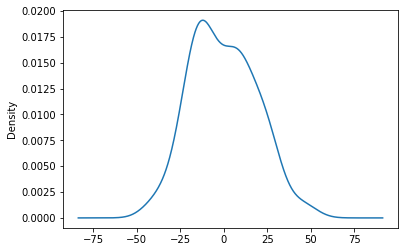

In [45]:
model_Arima_fit.resid.plot(kind='kde') #graficamos con respecto a todos los residuales
#parece ser un grafico centrado

In [46]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


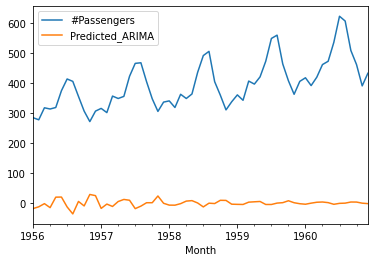

In [47]:
test_data[['#Passengers','Predicted_ARIMA']].plot() #Hay una gran diferencia
# A R I M A no esta dando un buen resultado

In [48]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12)) #3 y 5 lo obtuve de las graficas
# 1 1 1 con respecto al orden estacional
 # 12 :  la cantidad de meses en un año

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [51]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -265.240
Date:                            Sat, 06 Aug 2022   AIC                            548.481
Time:                                    21:17:37   BIC                            568.971
Sample:                                01-01-1949   HQIC                           556.638
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.938      0.638      0.523      -1.240       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.205       1.300
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.261     -0.423      0.672      -3.006       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.378      0.706      -0.788       0.533
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7325     81.050      1.082      0.279     -71.123     246.588
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
test_data.tail()

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,-0.615667
1960-09-01,508,-98.0,-82.0,45.0,3.106053
1960-10-01,461,-47.0,51.0,54.0,2.964142
1960-11-01,390,-71.0,-24.0,28.0,-0.732256
1960-12-01,432,42.0,113.0,27.0,-2.251383


In [54]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [57]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,1,1),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

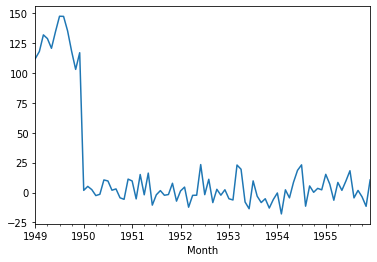

In [58]:
model_SARIMA_fit.resid.plot()

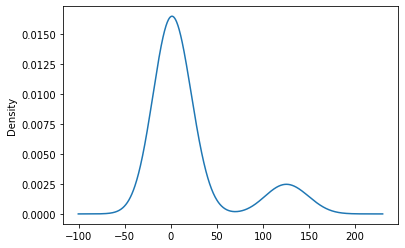

In [59]:
model_SARIMA_fit.resid.plot(kind='kde')

In [60]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,-18.695968,286.185246
1956-02-01,277,-7.0,-13.0,44.0,-12.830814,281.277527
1956-03-01,317,40.0,47.0,50.0,-2.329670,309.916979
1956-04-01,313,-4.0,-44.0,44.0,-15.562175,310.677274
1956-05-01,318,5.0,9.0,48.0,19.310693,311.335309
1956-06-01,374,56.0,51.0,59.0,19.647938,354.950168
1956-07-01,413,39.0,-17.0,49.0,-13.271470,403.398187
1956-08-01,405,-8.0,-47.0,58.0,-36.529638,385.071431
1956-09-01,355,-50.0,-42.0,43.0,4.998660,349.445647


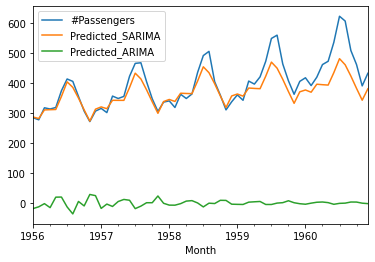

In [64]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
# Se obtiene una buena predicción con el modelo de SARIMA 